# **Financial Market News -Sentiment Analysis**

-------------

## **Objective**

The objective of this project is to analyze sentiment in financial market news articles. By classifying the sentiment of news articles as positive or negative, we can gain insights into market movements and investor sentiment. This analysis will help in understanding the impact of news on financial markets, and could potentially be used for predictive modeling and trading strategies.

## **Data Source**

https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Financial%20Market%20News.csv

## **Import Library**

In [1]:
import pandas as pd
import numpy as np

## **Import Data**

In [2]:
url = 'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Financial%20Market%20News.csv'
df = pd.read_csv(url, encoding="ISO-8859-1")

## **Describe Data**

In [3]:
df.head()

,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
0,01-01-2010,0,McIlroy's men catch cold from Gudjonsson,Obituary: Brian Walsh,Workplace blues leave employers in the red,Classical review: Rattle,Dance review: Merce Cunningham,Genetic tests to be used in setting premiums,Opera review: La Bohème,Pop review: Britney Spears,...,Finland 0 - 0 England,Healy a marked man,Happy birthday Harpers & Queen,Win unlimited access to the Raindance film fes...,Labour pledges £800m to bridge north-south divide,Wales: Lib-Lab pact firm despite resignation,Donald Dewar,Regenerating homes regenerates well-being in ...,Win £100 worth of underwear,TV guide: Random views
1,02-01-2010,0,Warning from history points to crash,Investors flee to dollar haven,Banks and tobacco in favour,Review: Llama Farmers,War jitters lead to sell-off,Your not-so-secret history,Review: The Northern Sinfonia,Review: Hysteria,...,Why Wenger will stick to his Gunners,Out of luck England hit rock bottom,Wilkinson out of his depth,Kinsella sparks Irish power play,Brown banished as Scots rebound,Battling Wales cling to lifeline,Ehiogu close to sealing Boro move,Man-to-man marking,Match stats,French referee at centre of storm is no strang...
2,03-01-2010,0,Comment: Why Israel's peaceniks feel betrayed,Court deals blow to seizure of drug assets,An ideal target for spooks,World steps between two sides intent on war,What the region's papers say,Comment: Fear and rage in Palestine,Poverty and resentment fuels Palestinian fury,Republican feud fear as dissident is killed,...,FTSE goes upwardly mobile,At this price? BP Amoco,Go fish,Bosnian Serb blows himself up to evade law,Orange float delayed to 2001,"Angry factory workers root out fear, favours a...",Smith defied advice on dome payout,Xerox takes the axe to jobs,Comment: Refugees in Britain,Maverick who sparked the new intifada
3,04-01-2010,1,"£750,000-a-goal Weah aims parting shot",Newcastle pay for Fletcher years,Brown sent to the stands for Scotland qualifier,Tourists wary of breaking new ground,Canary Wharf climbs into the FTSE 100,Review: Bill Bailey,Review: Classical,Review: New Contemporaries 2000,...,More cash on way for counties,Cairns carries Kiwis to victory,Year of Blanchflower's flourish when Spurs sto...,New direct approach brings only pay-per-blues,Third Division round-up,Second Division round-up,First Division round-up,McLean ends his career with a punch,Heskey grabs triple crown,Weah on his way as City march on
4,05-01-2010,1,Leeds arrive in Turkey to the silence of the fans,One woman's vision offers loan lifeline,Working Lives: How world leaders worked,Working Lives: Tricks of the trade,"Working Lives: six-hour days, long lunches and...",Pop review: We Love UK,World music review: Marisa Monte,Art review: Hollingsworth/Heyer,...,Duisenberg in double trouble,Pru to cut pension charges,Art review: Paul Graham,Shearer shot sparks Boro humiliation,Ridsdale's lingering fears as Leeds revisit Tu...,Champions League: Rangers v Galatasaray,Champions League: Lazio v Arsenal,Lazio 1 - 1 Arsenal,England in Pakistan,England given olive-branch reception


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4101 non-null   object
 1   Label    4101 non-null   int64 
 2   News 1   4101 non-null   object
 3   News 2   4101 non-null   object
 4   News 3   4101 non-null   object
 5   News 4   4101 non-null   object
 6   News 5   4101 non-null   object
 7   News 6   4101 non-null   object
 8   News 7   4101 non-null   object
 9   News 8   4101 non-null   object
 10  News 9   4101 non-null   object
 11  News 10  4101 non-null   object
 12  News 11  4101 non-null   object
 13  News 12  4101 non-null   object
 14  News 13  4101 non-null   object
 15  News 14  4101 non-null   object
 16  News 15  4101 non-null   object
 17  News 16  4101 non-null   object
 18  News 17  4101 non-null   object
 19  News 18  4101 non-null   object
 20  News 19  4101 non-null   object
 21  News 20  4101 non-null   object
 22  

In [5]:
df.shape

(4101, 27)

In [6]:
df.columns

Index(['Date', 'Label', 'News 1', 'News 2', 'News 3', 'News 4', 'News 5',
       'News 6', 'News 7', 'News 8', 'News 9', 'News 10', 'News 11', 'News 12',
       'News 13', 'News 14', 'News 15', 'News 16', 'News 17', 'News 18',
       'News 19', 'News 20', 'News 21', 'News 22', 'News 23', 'News 24',
       'News 25'],
      dtype='object')

## **Data Visualization**

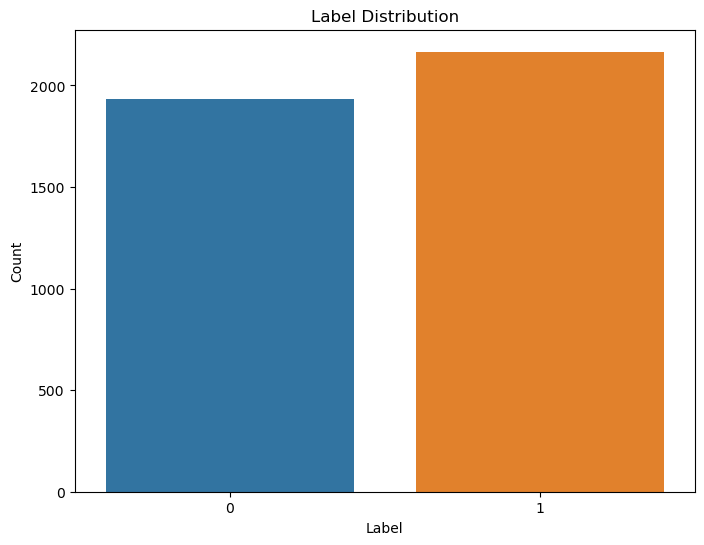

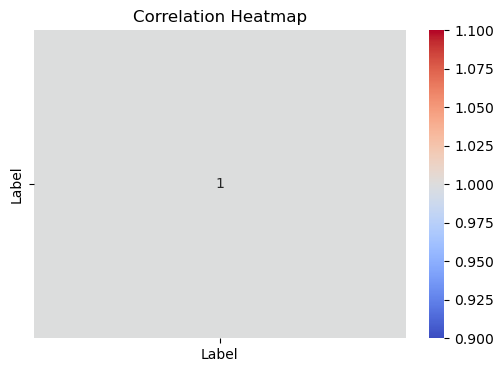

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Label'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df[['Label']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Data Preprocessing**

In [8]:
' '.join(str(x) for x in df.iloc[1,2:27])

"Warning from history points to crash Investors flee to dollar haven Banks and tobacco in favour Review: Llama Farmers War jitters lead to sell-off Your not-so-secret history Review: The Northern Sinfonia Review: Hysteria Review: The Guardsman Opera: The Marriage of Figaro Review: The Turk in Italy Deutsche spells out its plans for diversification Traders' panic sends oil prices skyward TV sport chief leaves home over romance Leader: Hi-tech twitch Why Wenger will stick to his Gunners Out of luck England hit rock bottom Wilkinson out of his depth Kinsella sparks Irish power play Brown banished as Scots rebound Battling Wales cling to lifeline Ehiogu close to sealing Boro move Man-to-man marking Match stats French referee at centre of storm is no stranger to controversy"

In [9]:
df.index

RangeIndex(start=0, stop=4101, step=1)

In [10]:
len(df.index)

4101

In [11]:
news=[]
for row in range(0,len(df.index)):
    news.append(' '.join(str(x) for x in df.iloc[row,2:27]))

In [12]:
type(news)

list

In [13]:
news[0]

"McIlroy's men catch cold from Gudjonsson Obituary: Brian Walsh Workplace blues leave employers in the red Classical review: Rattle Dance review: Merce Cunningham Genetic tests to be used in setting premiums Opera review: La Bohème Pop review: Britney Spears Theatre review: The Circle Wales face a fraught night Under-21  round-up Smith off to blot his copybook Finns taking the mickey Praise wasted as Brown studies injury options Ireland wary of minnows Finland 0 - 0 England Healy a marked man Happy birthday Harpers & Queen Win unlimited access to the Raindance film festival Labour pledges £800m to bridge north-south divide Wales: Lib-Lab pact firm despite resignation Donald Dewar Regenerating homes  regenerates well-being in people Win £100 worth of underwear TV guide: Random views"

## **Define Target Variable (y) and Feature Variables (X)**

In [14]:
X=news

In [15]:
type(X)

list

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv=CountVectorizer(lowercase=True,ngram_range=(1,1))

In [18]:
X=cv.fit_transform(X)

In [19]:
X.shape

(4101, 48527)

In [20]:
y=df['Label']

In [21]:
y.shape

(4101,)

## **Train Test Split**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=2529)

## **Modeling**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier(n_estimators=200)

In [26]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [27]:
y_pred=rf.predict(X_test)

## **Model Evaluation**

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
confusion_matrix(y_test,y_pred)

array([[149, 432],
       [182, 468]], dtype=int64)

## **Prediction**

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.26      0.33       581
           1       0.52      0.72      0.60       650

    accuracy                           0.50      1231
   macro avg       0.49      0.49      0.47      1231
weighted avg       0.49      0.50      0.47      1231



## **Explaination**

Objective : The goal of this project is to conduct sentiment analysis on financial market news articles. By classifying the sentiment as positive or negative, we aim to uncover trends that could influence market behavior, helping to inform trading strategies and predictive modeling.

Data Source : We'll use a dataset of financial news articles available from a GitHub repository. This dataset, containing the text of news articles and related metadata, will be downloaded and processed locally.

Import Library : We'll import essential Python libraries, including Pandas for data manipulation, NumPy for numerical operations, and sklearn for machine learning tasks such as model training and evaluation.

Import Data : The dataset will be loaded into our environment using Pandas, which allows us to easily handle the data in a DataFrame format. This step is crucial for making the data accessible for analysis and model building.

Describe Data : After importing the data, we'll generate descriptive statistics to understand its structure and key characteristics. This includes identifying the number of articles, their average length, and the distribution of sentiment labels.

Data Visualization : We’ll create visualizations to explore the dataset, helping to identify patterns and trends within the data. These visualizations will provide a clearer understanding of the sentiment distribution.

Data Preprocessing : The preprocessing stage involves cleaning the text data by removing stopwords, punctuation, and other irrelevant content. We'll tokenize the text and prepare it for input into the machine learning model, ensuring the data is in an optimal format.

Define Target Variable (y) and Feature Variables (X) : In this step, we define the target variable (y) as the sentiment label (positive or negative). The feature variables (X) will be the preprocessed text data used for training the model.

Train Test Split : We'll split the dataset into training and testing sets with a test_size of 0.3. This split will allow us to train the model on 70% of the data and evaluate its performance on the remaining 30%.

Modeling : We will use the Random Forest classification algorithm to model the relationship between the feature variables and the target variable. The model will be trained on the training set to classify the sentiment of the news articles.

Model Evaluation : The model's performance will be assessed using accuracy and other relevant metrics from the sklearn library. These metrics will help us evaluate how well the model predicts sentiment on the test set.

Prediction : Once the model is evaluated, it will be used to predict the sentiment of new financial news articles, providing insights into market trends and potentially informing trading decisions.